In [1]:
import shapely
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon

from shapely import wkt

import geojson
import geopandas
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, Markdown, Latex
import sys

%matplotlib inline

import requests
from requests.auth import HTTPBasicAuth

import json
import time

In [2]:
geopandas.datasets.get_path('naturalearth_lowres')
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
multix = world[world.name=='Australia'].geometry

In [5]:
def plotColumnYearMonth(colstring,iyear,imonth,np):
    #print(f"Month: {imonth} Year: {iyear}")
    #print("-----------------------------")
    um = pd.read_csv(f"coverage{iyear}-{imonth}-01T00:00:00.000Z.csv")
    filmi = um["filtered_days"].min()
    filme = um["filtered_days"].mean()
    filma = um["filtered_days"].max()
    dcmi = um["day_count"].min()
    dcme = um["day_count"].mean()
    dcma = um["day_count"].max()
    #print(f"Mean number of imaged days:{dcme}")
    #print(f"Mean number of imaged days with less than 50% cloud cover:{filme}")
    tc = 0
    dpm = [0,31,28,31,30,31,30,31,31,30,31,30,31]
    cmap_reds=plt.cm.get_cmap('Reds', dpm[np])
    rows_list = []
    y = -40.0
    x = 145.0
    for v in range(120):#120
        x = 145.0
        y += 0.50
        for r in range(200):#200
            x += 0.50
            p = Point(x,y)
            t = multix.contains(p)
            if(t.any() and tc < 1000):
                s = Point(x,y).buffer(0.1)
                g1 = shapely.wkt.loads(str(s))
                g2 = geojson.Feature(geometry=g1, properties={})
                #print(g2["geometry"])
                #stats_endpoint_request = constructStatRequest(g2["geometry"])
                #print(stats_endpoint_request)

                dict1 = {'Coordinates': Point(x,y).buffer(0.1),
                         'filtered_days': um['filtered_days'][tc],
                        'day_count': um['day_count'][tc]}
                rows_list.append(dict1)
                tc += 1


    um2 = pd.DataFrame(rows_list)
    xgdf = geopandas.GeoDataFrame(um2, geometry='Coordinates')
    ax = world[world.name == 'Australia'].plot(
        color='white', edgecolor='black',figsize=(12,12))
    plt.title(f"Month: {imonth} Year: {iyear}                       Imaged Days Mean: {round(dcme,2)}  Filtered Days Mean: {round(filme,2)}")
    
    #ax = lsoas.plot(axes=ax)
    # We can now plot our GeoDataFrame.
    xgdf.plot(ax=ax, color='white')
    
    
    for xx in range(dpm[np]+1):
        if(xx>0):
            podf =  um2.loc[um2[colstring] == xx]
            xpodf = geopandas.GeoDataFrame(podf, geometry='Coordinates')
            xpodf.plot(ax=ax, color=cmap_reds(xx))


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


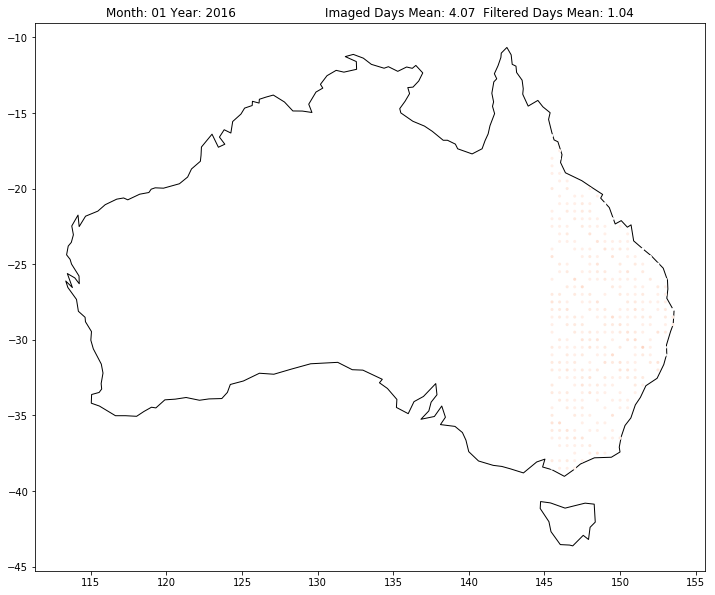

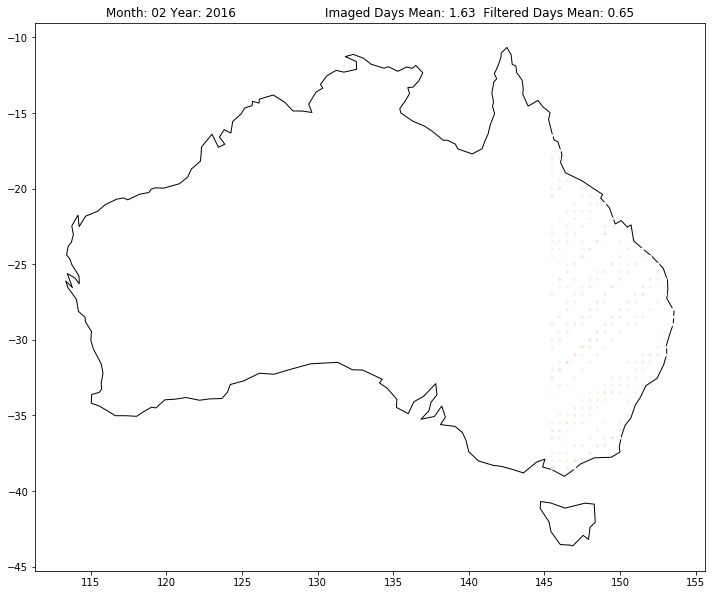

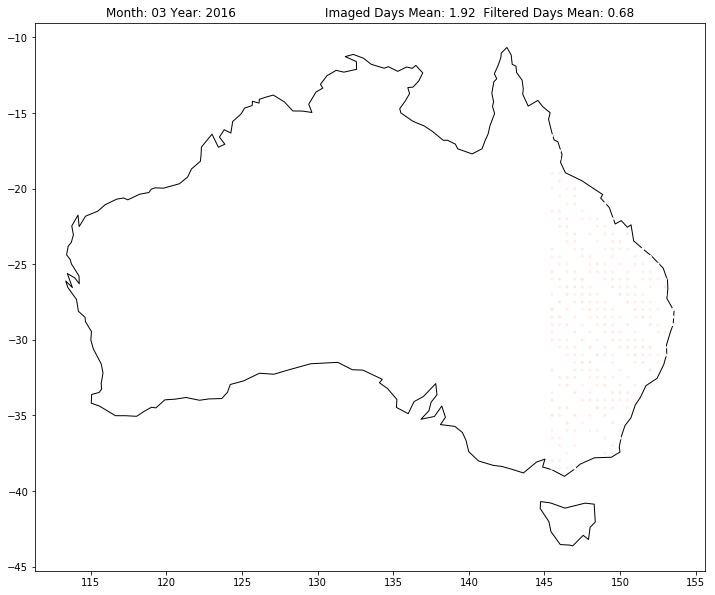

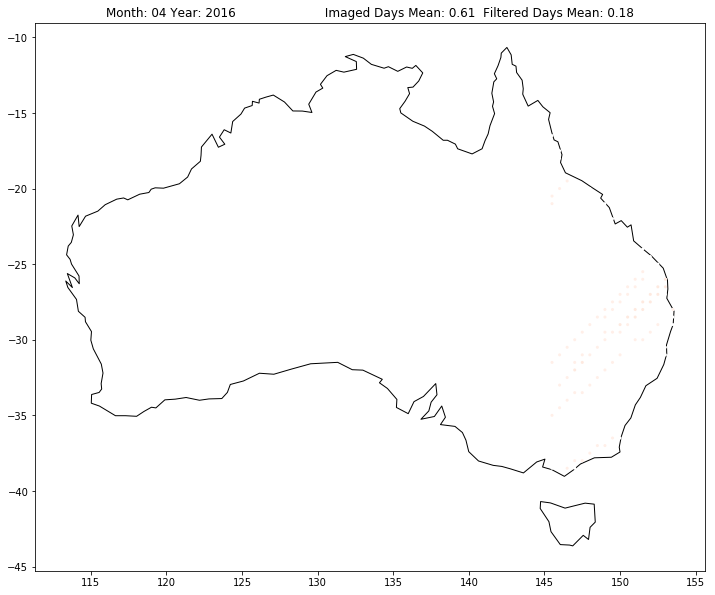

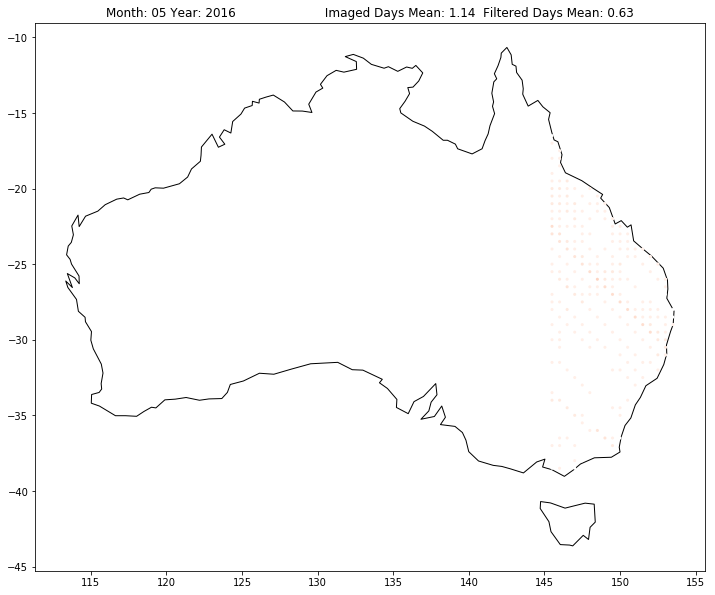

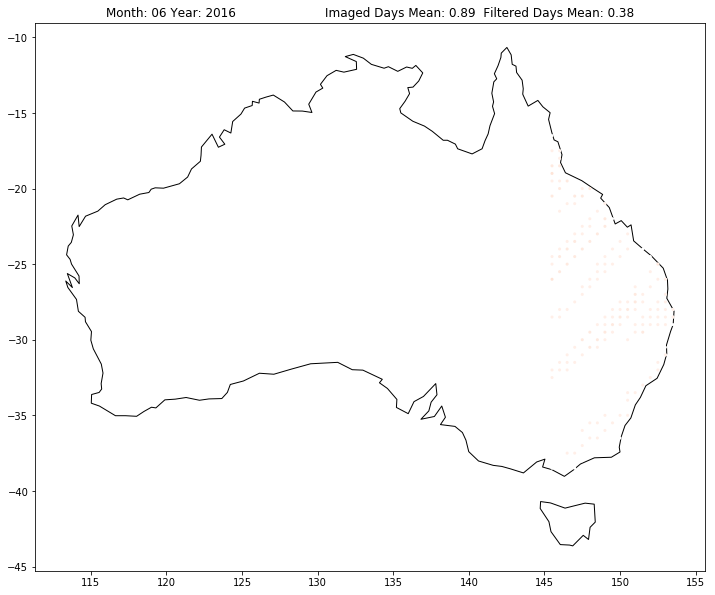

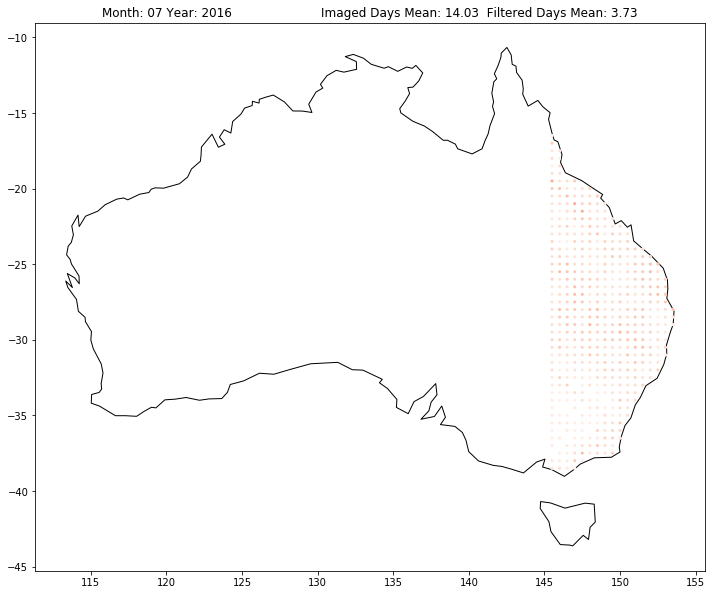

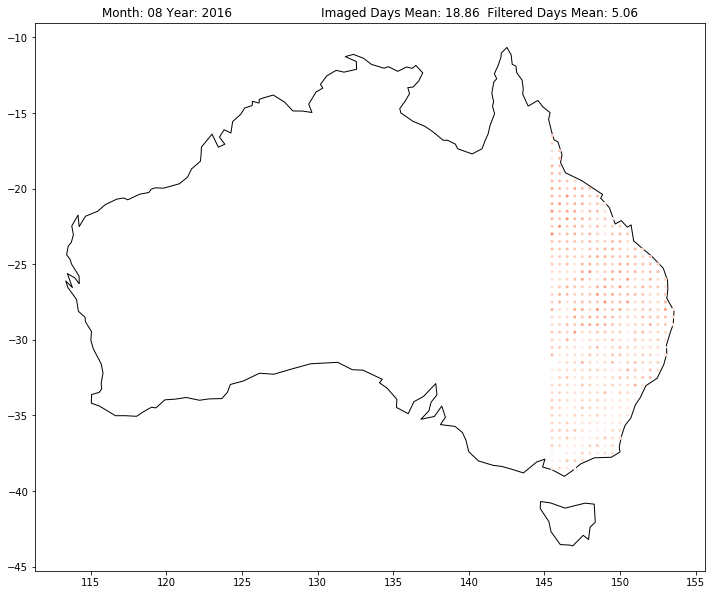

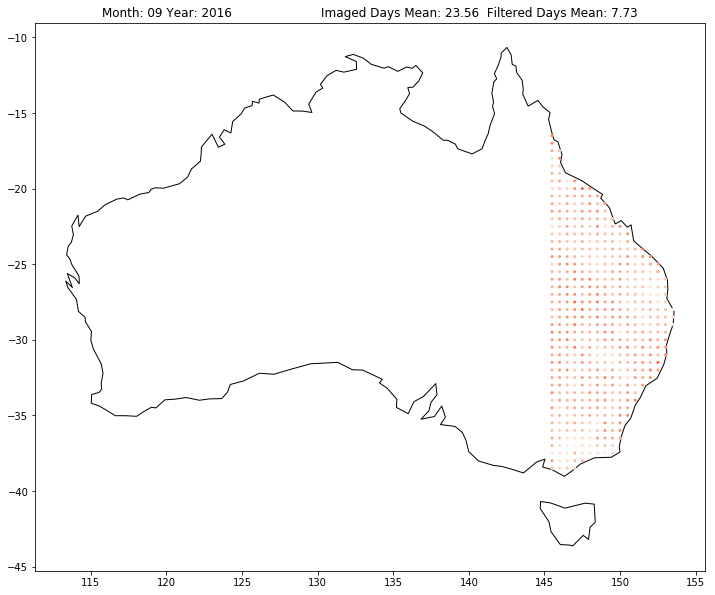

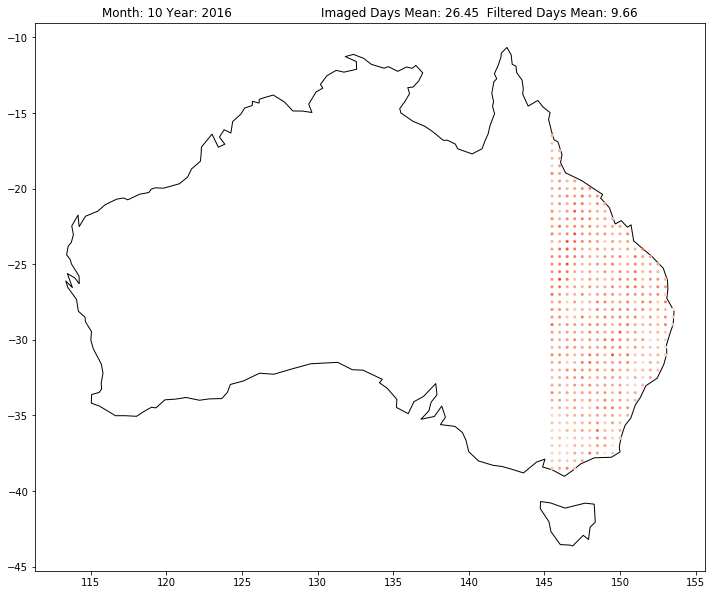

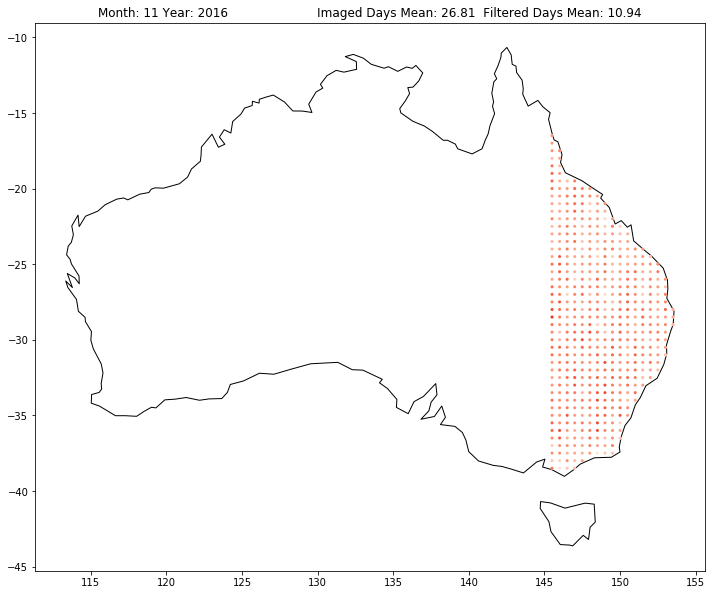

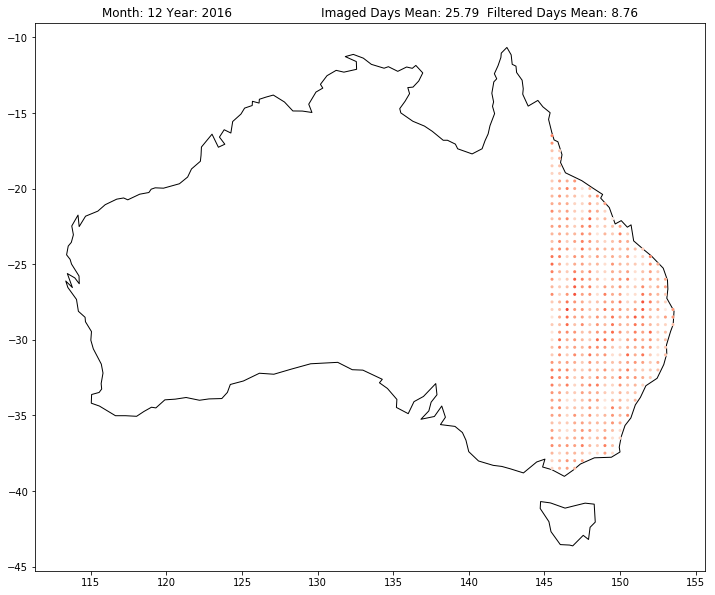

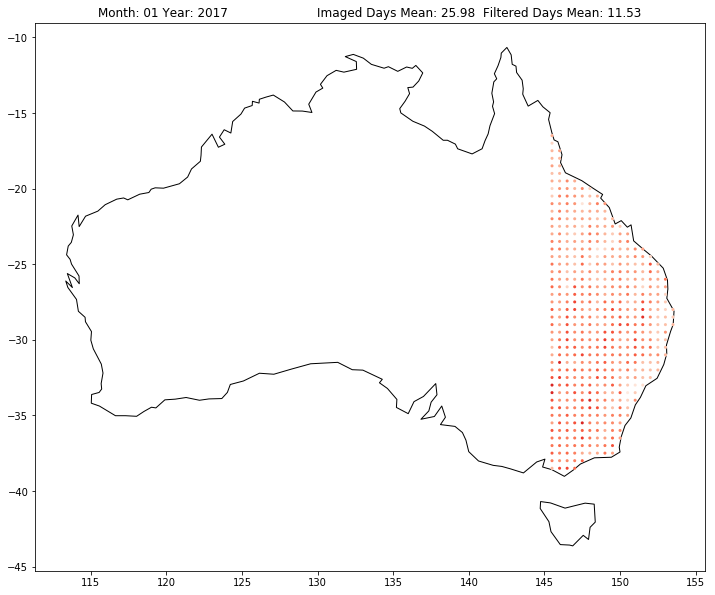

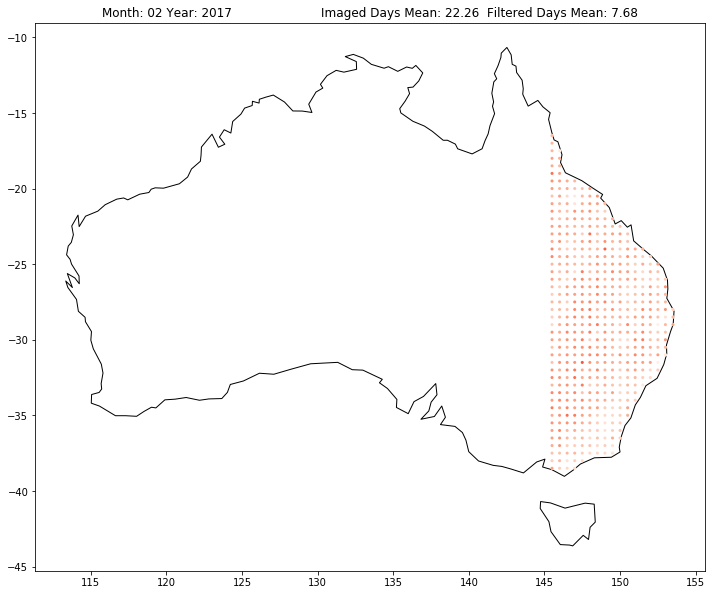

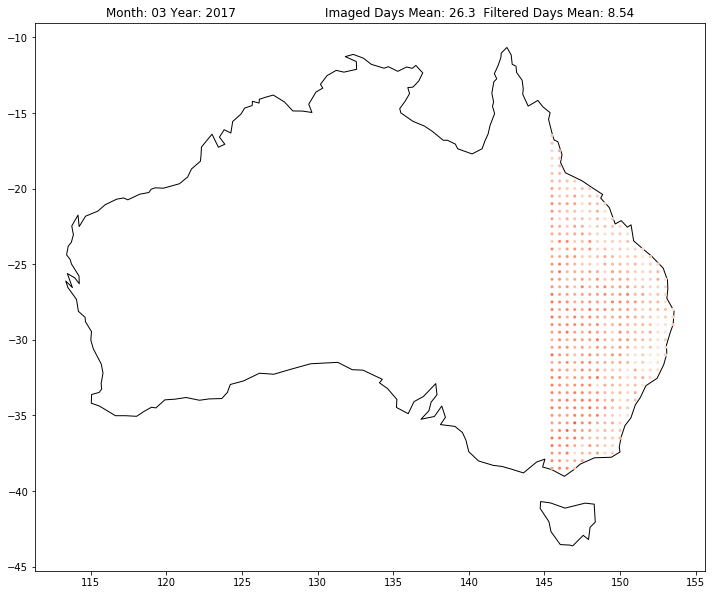

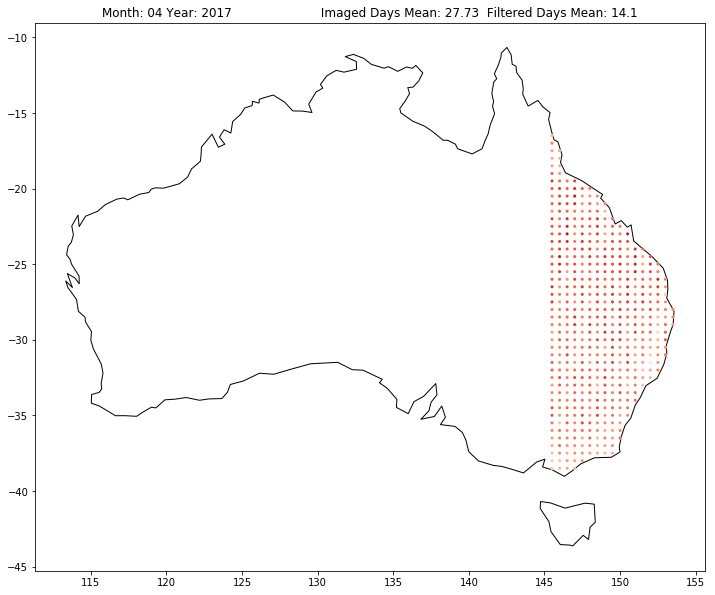

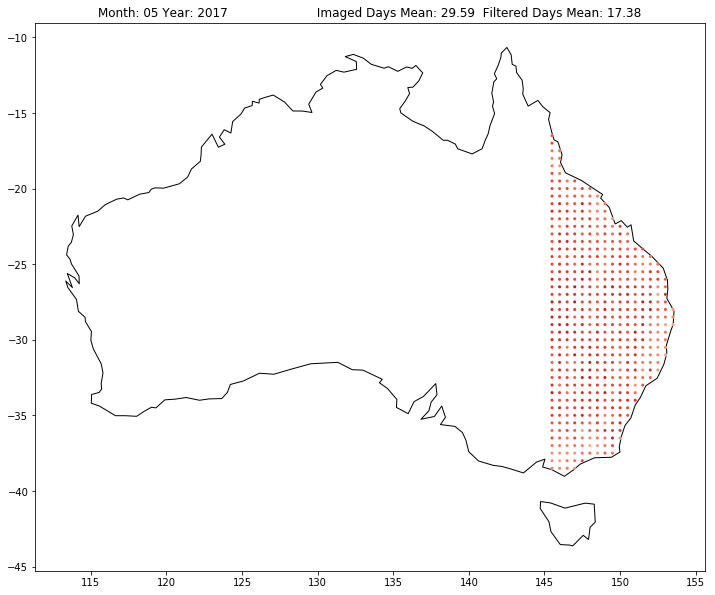

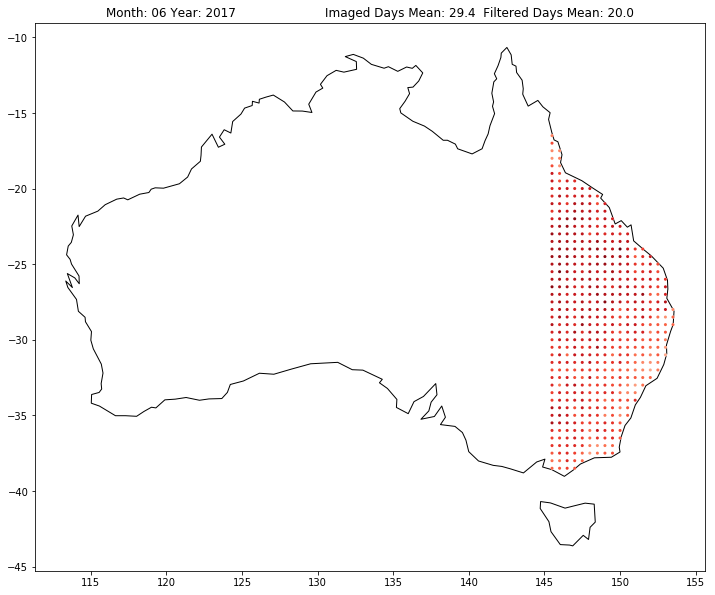

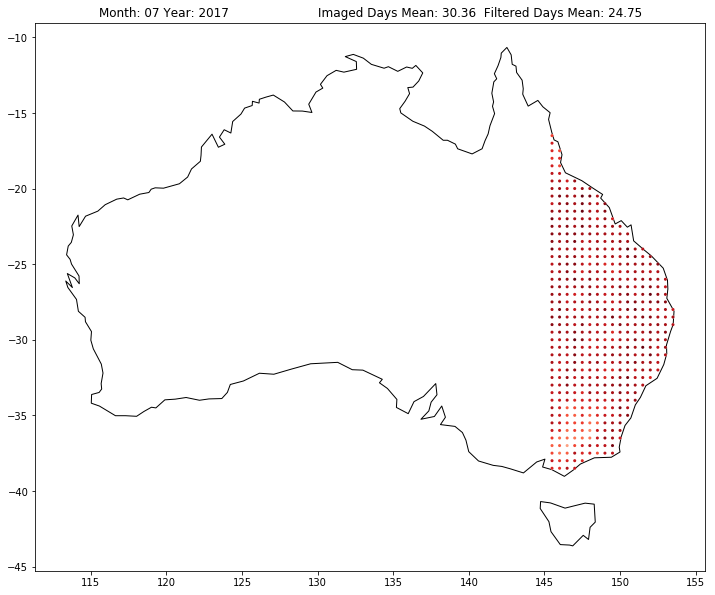

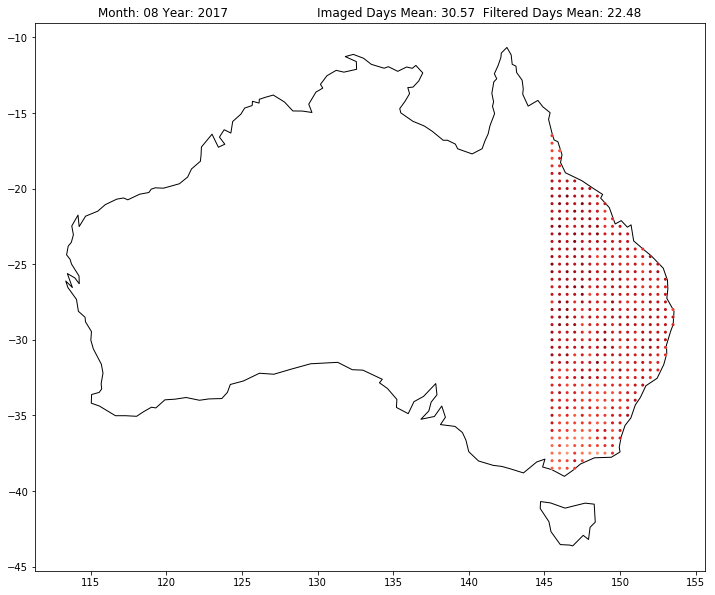

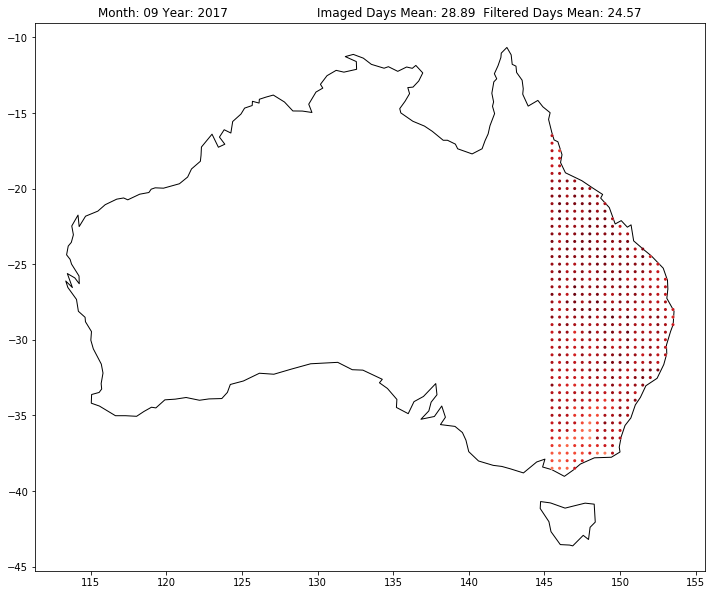

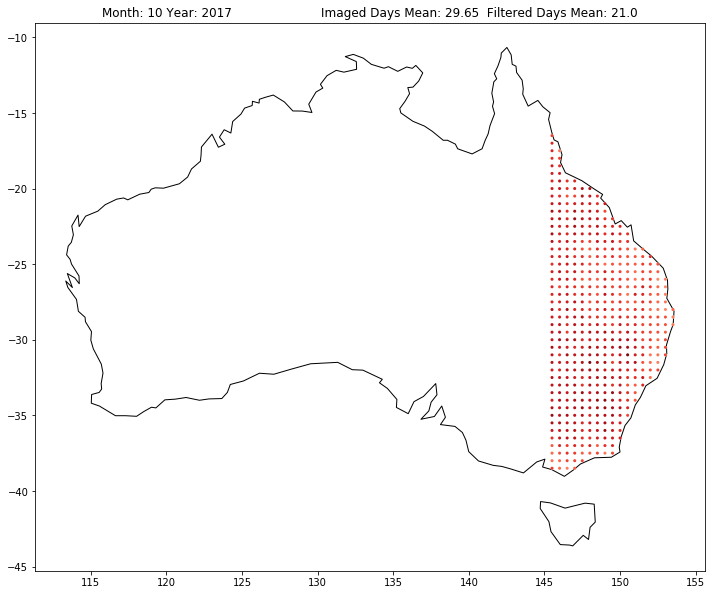

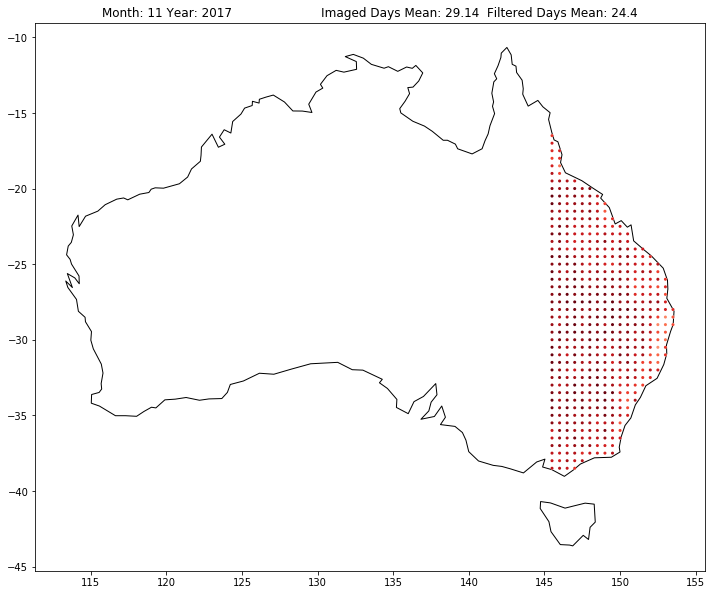

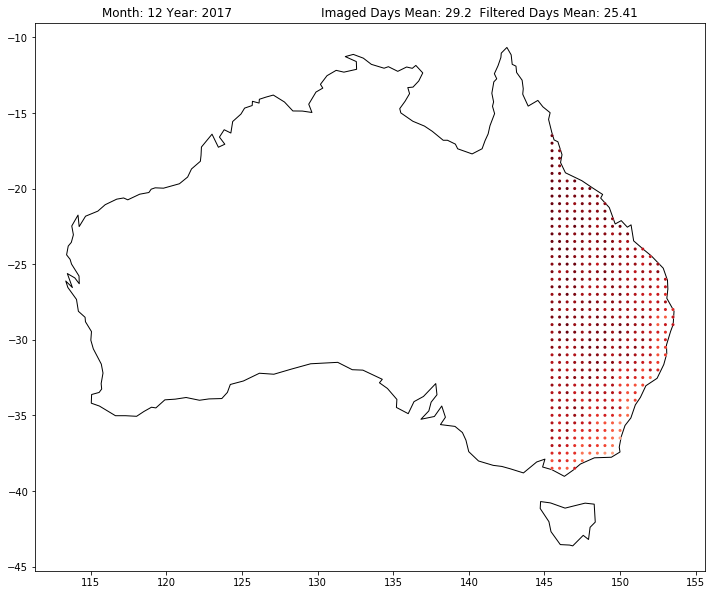

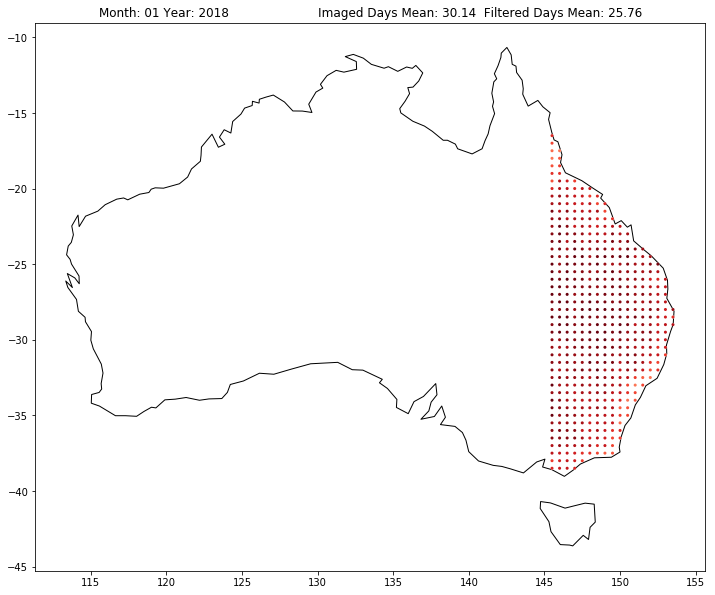

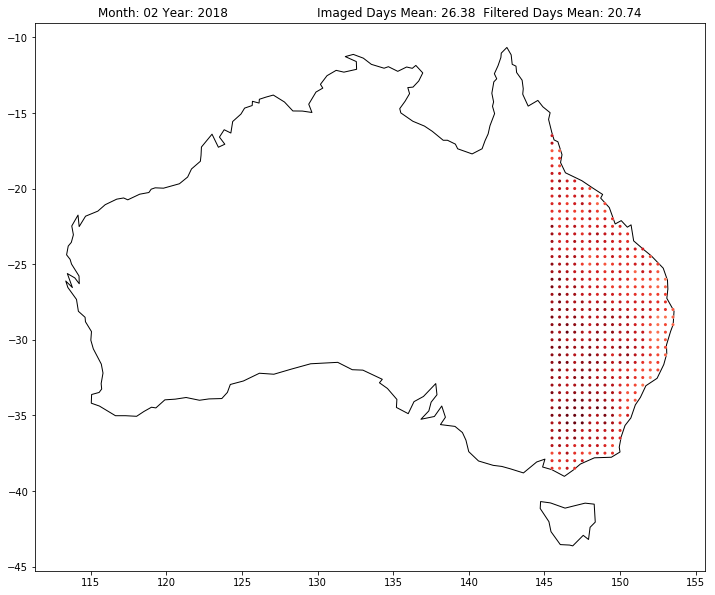

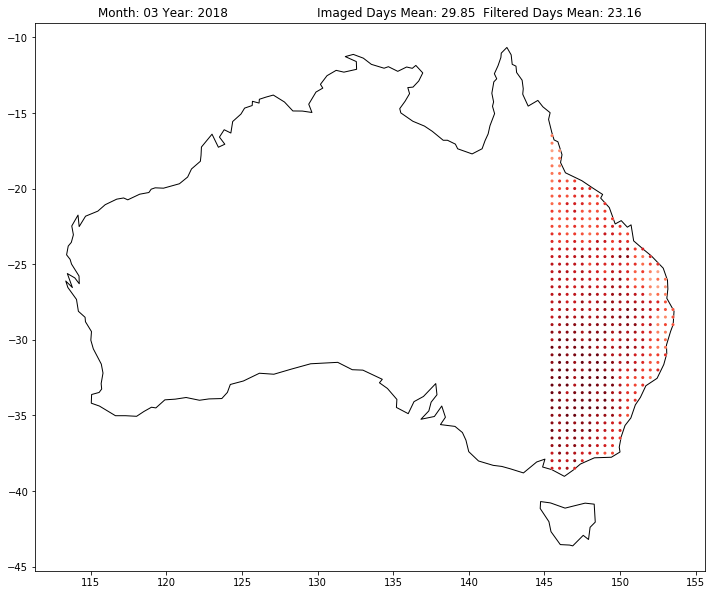

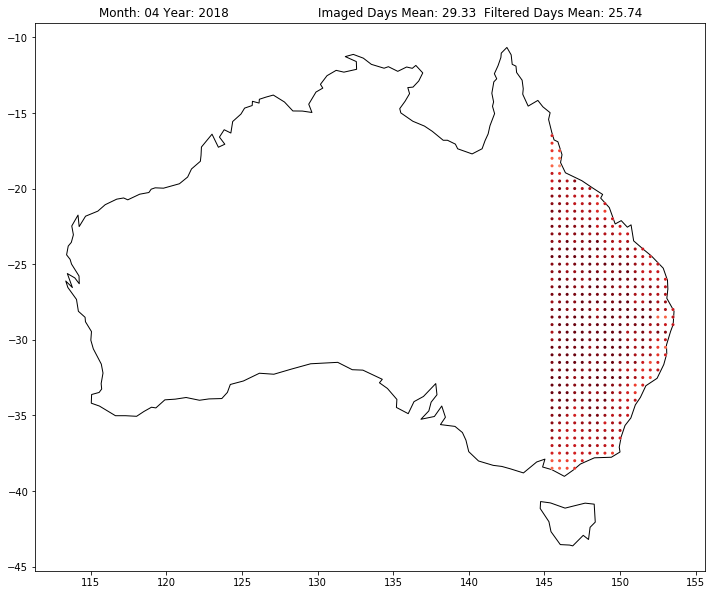

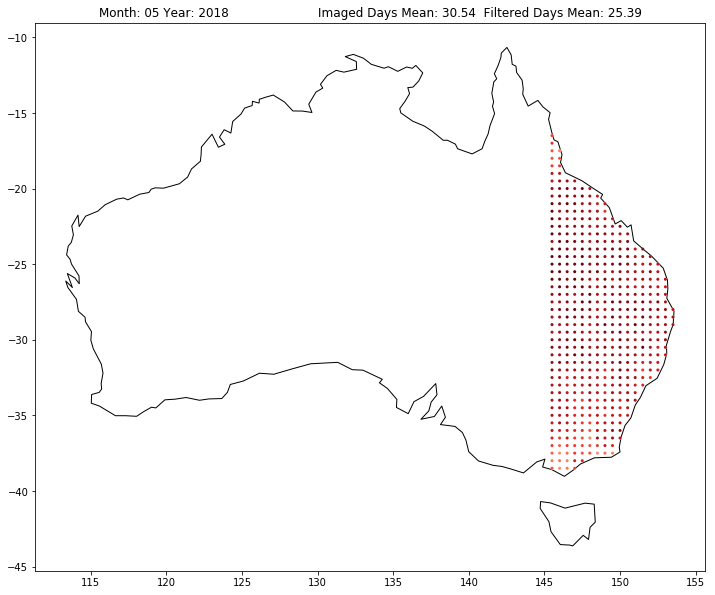

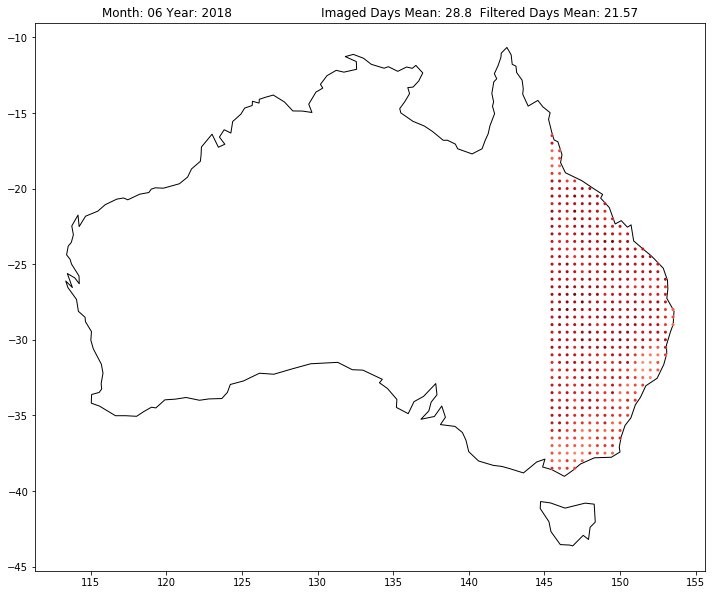

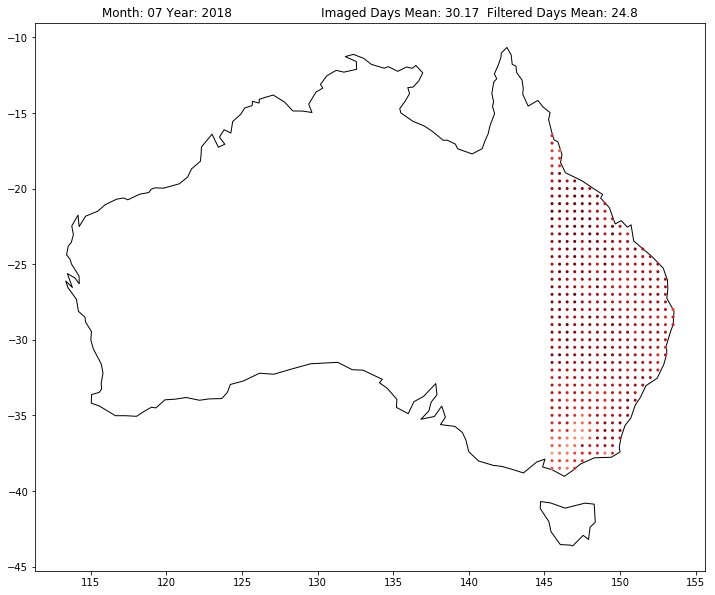

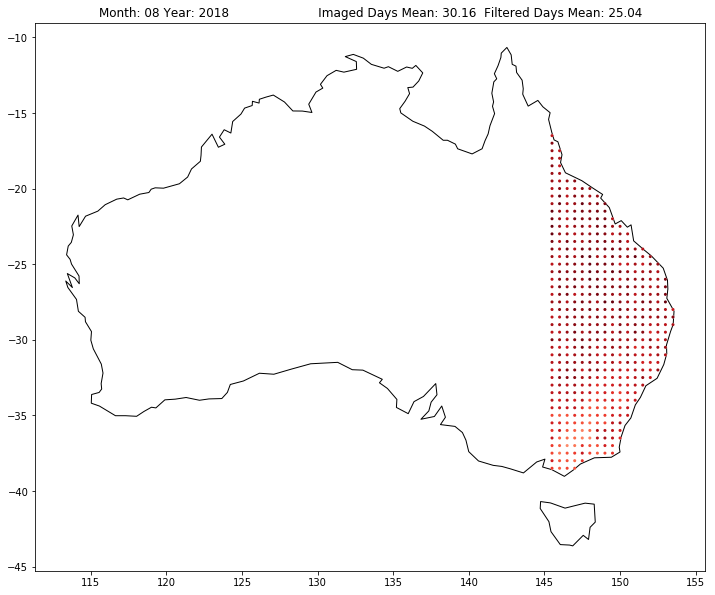

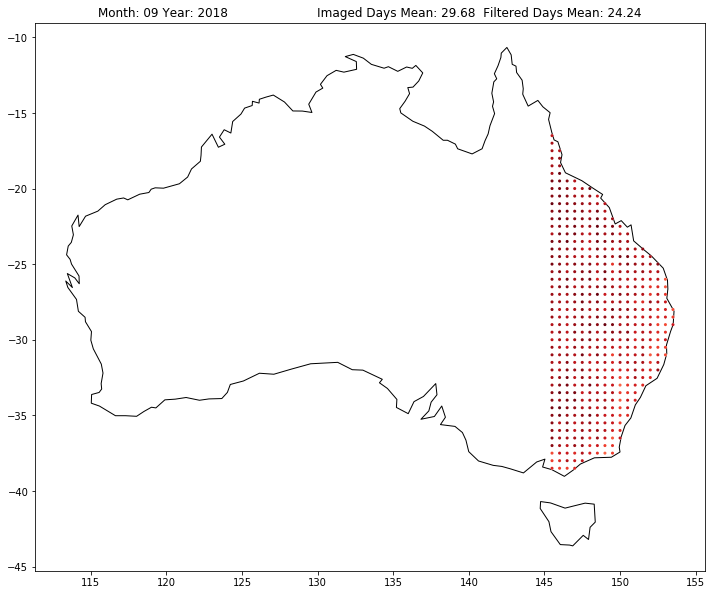

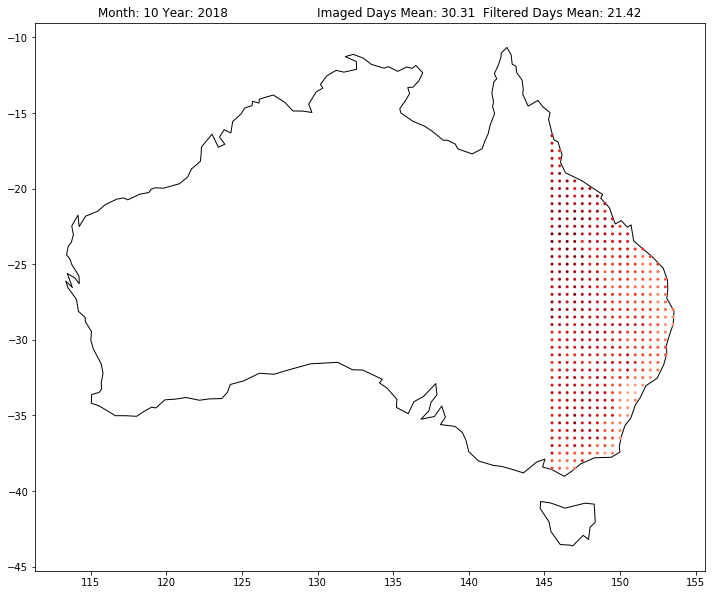

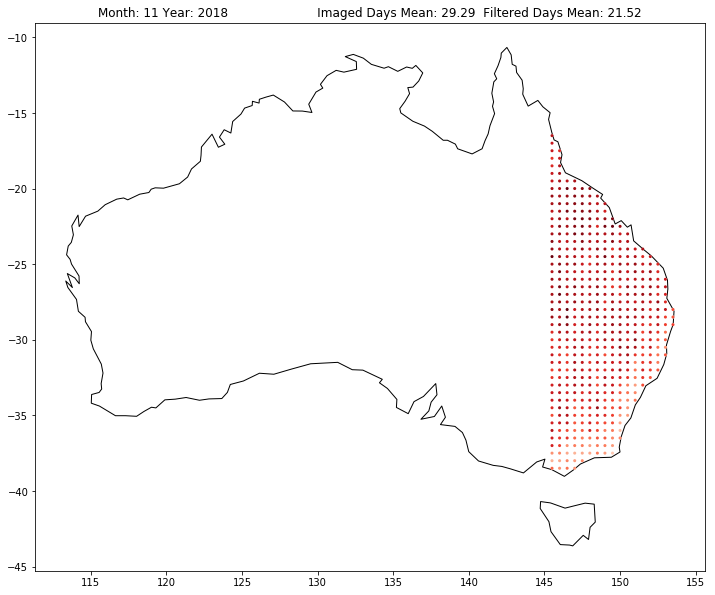

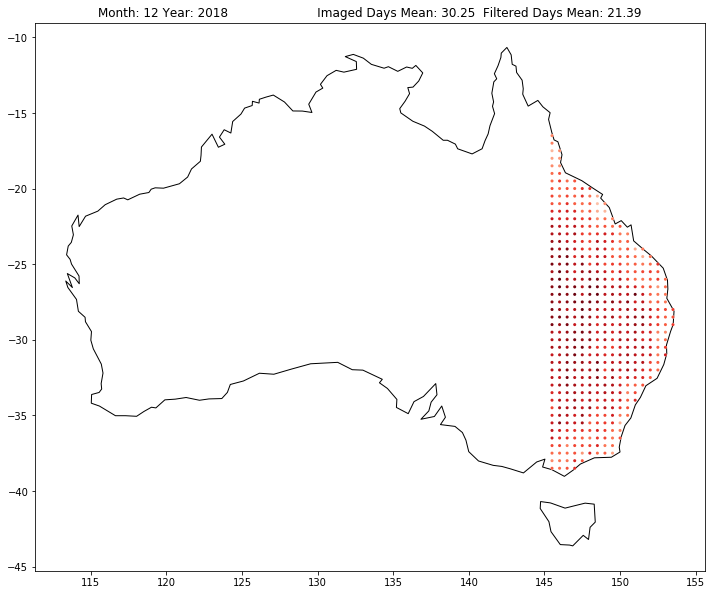

In [7]:
years = ["2016","2017","2018"]
ic = ["01","02","03","04","05","06","07","08","09","10","11","12"]
np = 0
for y in years:
    np = 0
    for m in ic:
        np += 1
        plotColumnYearMonth("filtered_days",y,m,np)